In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
mm=pd.read_csv('E:/KR UoE Docs/Term 3 Modules/Dissertation/Dataset/train.csv')

In [3]:
mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [4]:
mm.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [5]:
mm.shape

(913000, 4)

In [6]:
mm.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [31]:
#Finding the Missing Values 
mm.isnull().any()

date     False
store    False
item     False
sales    False
dtype: bool

In [8]:
#No Missing Vales in the Dataset

In [9]:
mm.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [10]:
mm.tail(10)

,date,store,item,sales
912990,2017-12-22,10,50,75
912991,2017-12-23,10,50,70
912992,2017-12-24,10,50,76
912993,2017-12-25,10,50,51
912994,2017-12-26,10,50,41
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [32]:
mm['date'] =  pd.to_datetime(mm['date'])

In [33]:
mm=mm.set_index('date')

In [34]:
mm

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [35]:
# To get the detailed analysis, furtehr columns i.e. 'day of week' 'day' 'month' and 'year' have been created 
mm['dayofweek'] = mm.index.dayofweek
mm['day'] = mm.index.day
mm['month'] = mm.index.month
mm['year'] = mm.index.year

In [36]:
mm

,store,item,sales,dayofweek,day,month,year
date,,,,,,,
2013-01-01,1,1,13,1,1,1,2013
2013-01-02,1,1,11,2,2,1,2013
2013-01-03,1,1,14,3,3,1,2013
2013-01-04,1,1,13,4,4,1,2013
2013-01-05,1,1,10,5,5,1,2013
...,...,...,...,...,...,...,...
2017-12-27,10,50,63,2,27,12,2017
2017-12-28,10,50,59,3,28,12,2017
2017-12-29,10,50,74,4,29,12,2017


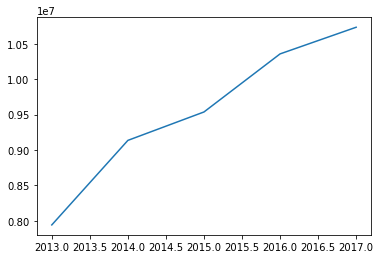

In [49]:
plt.plot(mm.groupby('year').sum()['sales'])

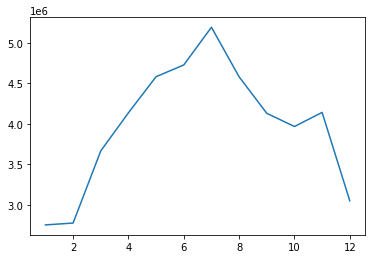

In [50]:
mm.groupby('month').sum()['sales']
plt.plot(mm.groupby('month').sum()['sales'])

dayofweek
0    5385853
1    6293481
2    6312090
3    6749880
4    7198021
5    7655482
6    8109705
Name: sales, dtype: int64


,sales
dayofweek,
0,5385853
1,6293481
2,6312090
3,6749880
4,7198021
5,7655482
6,8109705


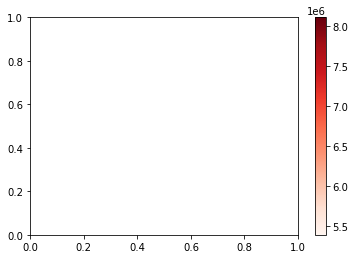

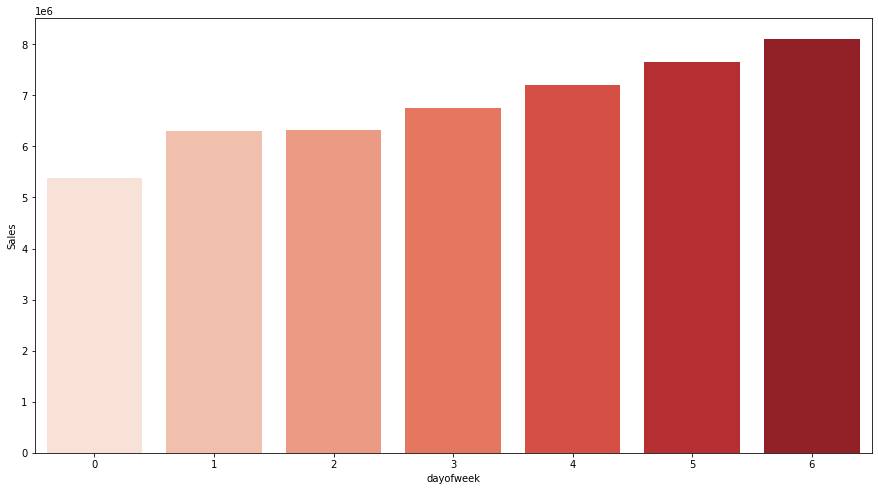

In [82]:
ser1 = mm.groupby('dayofweek').sum()['sales'].sort_values()
print(ser1)
plot = plt.scatter(ser1.index, ser1.values, c=ser1.values, cmap='Reds')
plt.clf()
plt.colorbar(plot)

plt.figure(figsize=(15,8))


ax = sns.barplot(x=ser1.index,y=ser1.values, hue=ser1.values, palette='Reds', dodge=False)
ax.set_ylabel('Sales')
ax.legend_.remove()
pd.DataFrame(ser1).style.background_gradient(cmap='Reds')
## 5 plots: sales with month, dayofweek, year, item, store

month
1     2753149
2     2776177
3     3666182
4     4136467
5     4582437
6     4726911
7     5192393
8     4580655
9     4130457
10    3967520
11    4141356
12    3050808
Name: sales, dtype: int64


,sales
month,
1,2753149
2,2776177
3,3666182
4,4136467
5,4582437
6,4726911
7,5192393
8,4580655
9,4130457


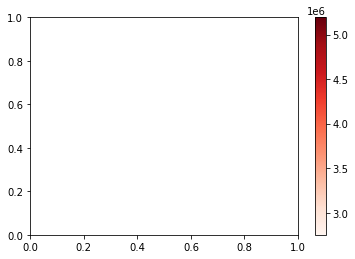

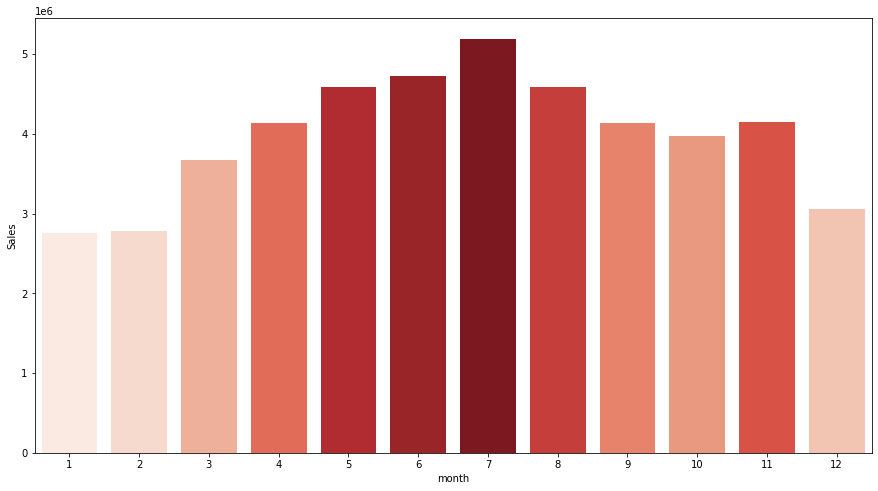

In [83]:
ser1 = mm.groupby('month').sum()['sales']
print(ser1)
plot = plt.scatter(ser1.index, ser1.values, c=ser1.values, cmap='Reds')
plt.clf()
plt.colorbar(plot)

plt.figure(figsize=(15,8))


ax = sns.barplot(x=ser1.index,y=ser1.values, hue=ser1.values, palette='Reds', dodge=False)
ax.set_ylabel('Sales')
ax.legend_.remove()
pd.DataFrame(ser1).style.background_gradient(cmap='Reds')

year
2013     7941243
2014     9135482
2015     9536887
2016    10357160
2017    10733740
Name: sales, dtype: int64


,sales
year,
2013,7941243
2014,9135482
2015,9536887
2016,10357160
2017,10733740


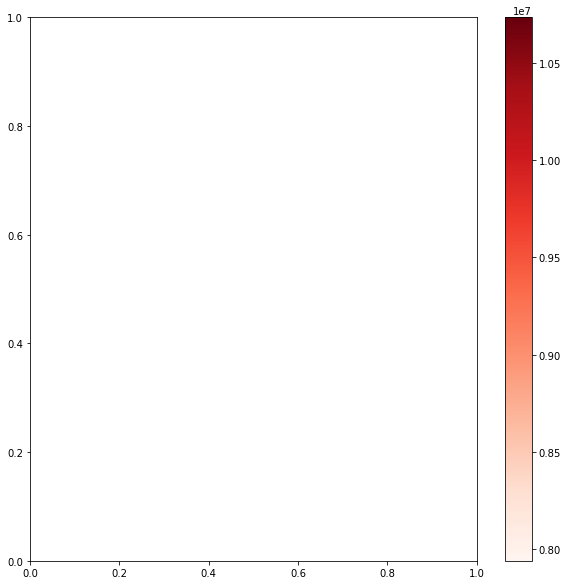

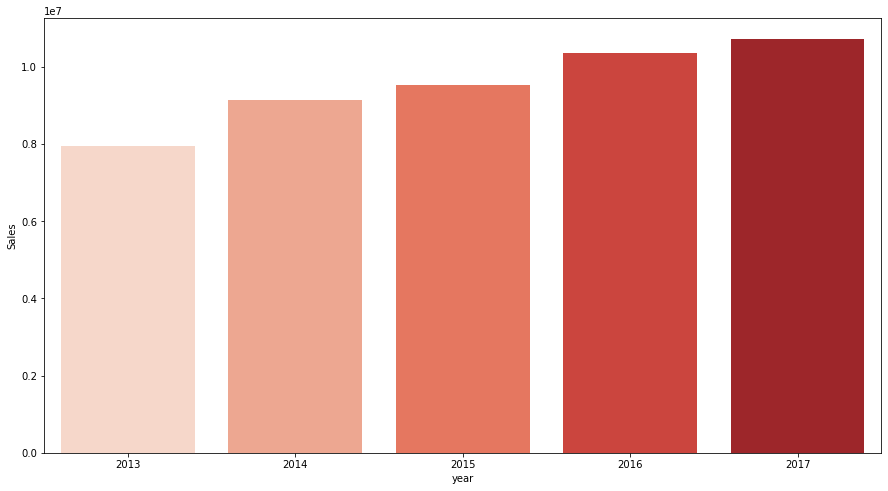

In [92]:
ser1 = mm.groupby('year').sum()['sales'].sort_values()
print(ser1)



plot = plt.scatter(ser1.index, ser1.values, c=ser1.values, cmap='Reds')
plt.clf()
plt.colorbar(plot)

plt.figure(figsize=(15,8))


ax = sns.barplot(x=ser1.index,y=ser1.values, hue=ser1.values, palette='Reds', dodge=False)
ax.set_ylabel('Sales')
ax.legend_.remove()
pd.DataFrame(ser1).style.background_gradient(cmap='Reds')

store
1     4315603
2     6120128
3     5435144
4     5012639
5     3631016
6     3627670
7     3320009
8     5856169
9     5025976
10    5360158
Name: sales, dtype: int64


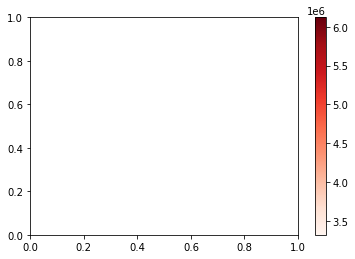

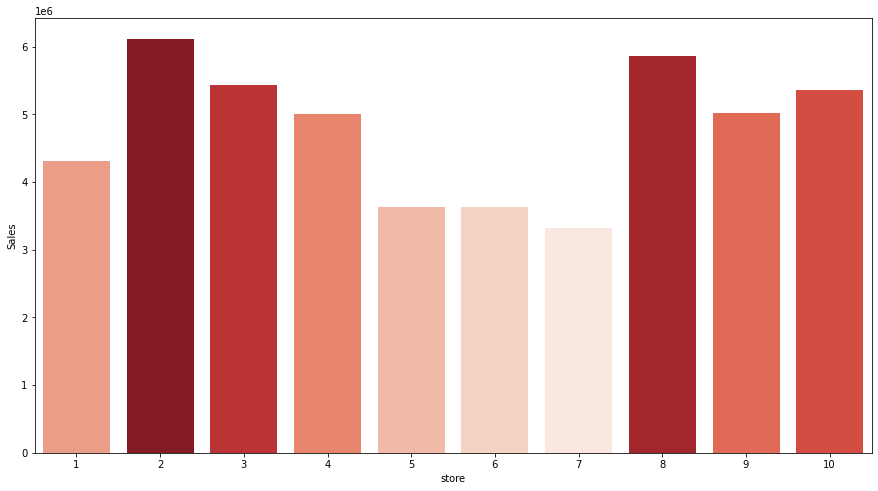

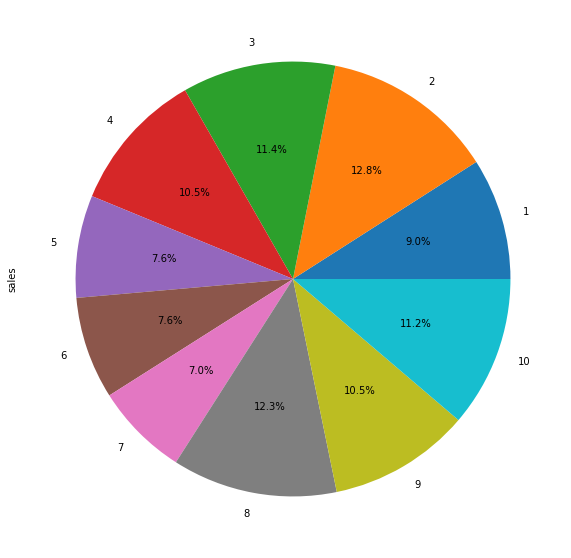

In [97]:
ser2 = mm.groupby('store').sum()['sales']
print(ser2)
plot = plt.scatter(ser2.index, ser2.values, c=ser2.values, cmap='Reds')
plt.clf()
plt.colorbar(plot)

plt.figure(figsize=(15,8))


ax = sns.barplot(x=ser2.index,y=ser2.values, hue=ser2.values, palette='Reds', dodge=False)
ax.set_ylabel('Sales')
ax.legend_.remove()
pd.DataFrame(ser2).style.background_gradient(cmap='Reds')

plt.subplots(figsize=(10,10))
ser2.plot.pie(autopct="%.1f%%")

item
1      401384
2     1069564
3      669087
4      401907
5      335230
6     1068281
7     1068777
8     1405108
9      938379
10    1337133
11    1271925
12    1271534
13    1539621
14    1071531
15    1607442
16     468480
17     602486
18    1538876
19     736892
20     867641
21     736190
22    1469971
23     534979
24    1205975
25    1473334
26     869981
27     402628
28    1604713
29    1271240
30     736554
31    1070845
32     803107
33    1270183
34     469935
35    1201541
36    1406548
37     534258
38    1470330
39     801311
40     534094
41     401759
42     669925
43     936635
44     536811
45    1471467
46    1070764
47     401781
48     937703
49     535663
50    1203009
Name: sales, dtype: int64


,sales
item,
1,401384
2,1069564
3,669087
4,401907
5,335230
6,1068281
7,1068777
8,1405108
9,938379


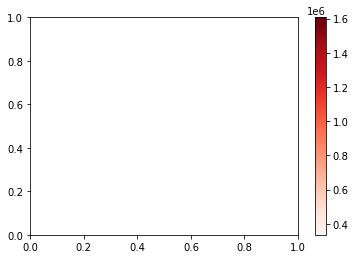

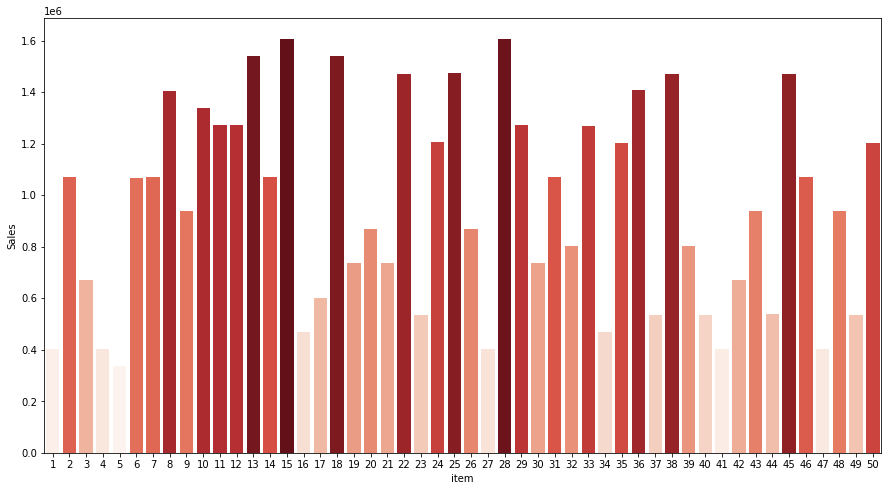

In [84]:
ser2 = mm.groupby('item').sum()['sales']
print(ser2)
plot = plt.scatter(ser2.index, ser2.values, c=ser2.values, cmap='Reds')
plt.clf()
plt.colorbar(plot)

plt.figure(figsize=(15,8))


ax = sns.barplot(x=ser2.index,y=ser2.values, hue=ser2.values, palette='Reds', dodge=False)
ax.set_ylabel('Sales')
ax.legend_.remove()
pd.DataFrame(ser2).style.background_gradient(cmap='Reds')

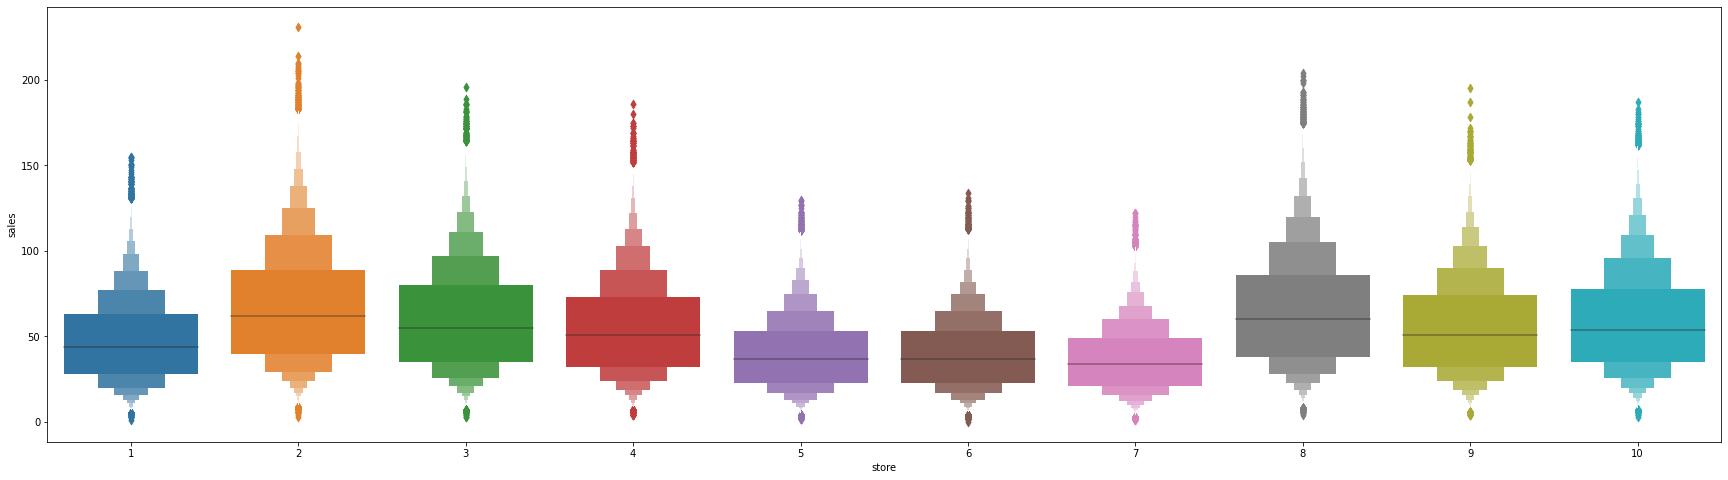

In [91]:
plt.figure(figsize=(30,8))
sns.boxenplot(x = 'store', y = 'sales', data = mm)



store
1      861710
2     1222184
3     1086103
4     1002730
5      725342
6      725917
7      664267
8     1171046
9     1006021
10    1071567
Name: sales, dtype: int64


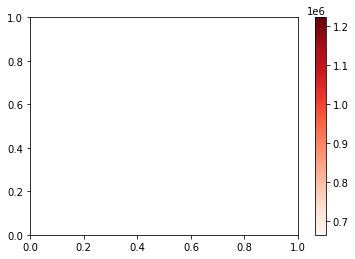

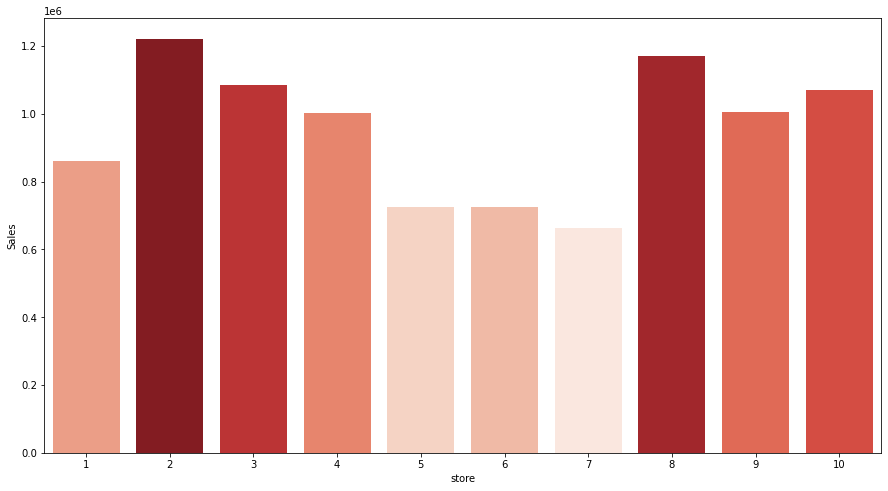

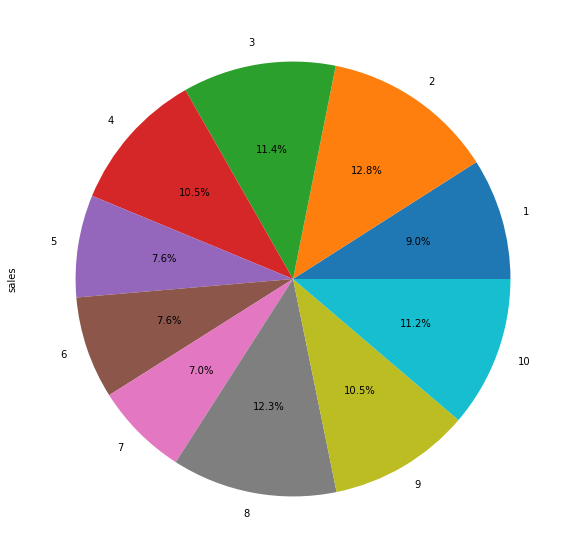

In [104]:
ser2 = mm[mm['year']==2015].groupby('store').sum()['sales']
print(ser2)
plot = plt.scatter(ser2.index, ser2.values, c=ser2.values, cmap='Reds')
plt.clf()
plt.colorbar(plot)

plt.figure(figsize=(15,8))


ax = sns.barplot(x=ser2.index,y=ser2.values, hue=ser2.values, palette='Reds', dodge=False)
ax.set_ylabel('Sales')
ax.legend_.remove()
pd.DataFrame(ser2).style.background_gradient(cmap='Reds')

plt.subplots(figsize=(10,10))
ser2.plot.pie(autopct="%.1f%%")

In [101]:
# ser2 = mm.groupby('store','year').sum()['sales']
# print(ser2)
mm[mm['year']==2017]

,store,item,sales,dayofweek,day,month,year
date,,,,,,,
2017-01-01,1,1,19,6,1,1,2017
2017-01-02,1,1,15,0,2,1,2017
2017-01-03,1,1,10,1,3,1,2017
2017-01-04,1,1,16,2,4,1,2017
2017-01-05,1,1,14,3,5,1,2017
...,...,...,...,...,...,...,...
2017-12-27,10,50,63,2,27,12,2017
2017-12-28,10,50,59,3,28,12,2017
2017-12-29,10,50,74,4,29,12,2017


In [ ]:
# Relationship Analysis

In [37]:
corelation=mm.corr()

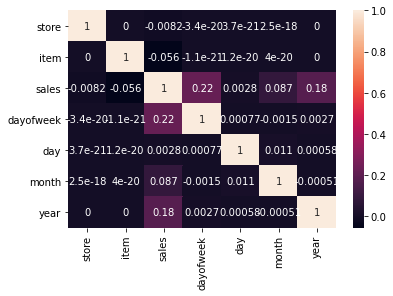

In [38]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

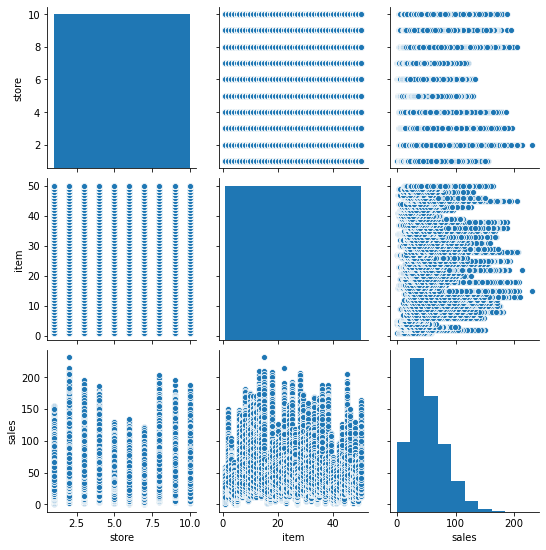

In [16]:
sns.pairplot(mm)

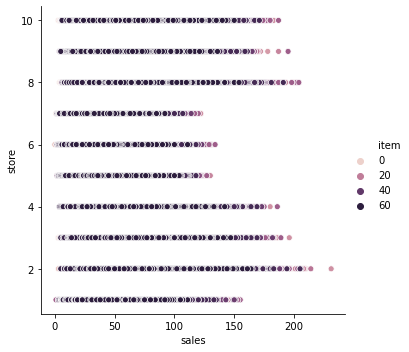

In [21]:
sns.relplot(x='sales',y='store', hue='item',data=mm)

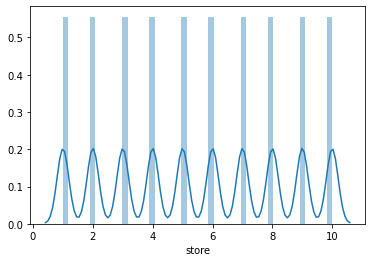

In [22]:
sns.distplot(mm['store'])

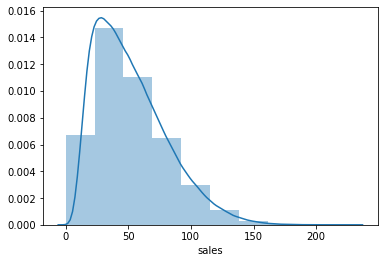

In [29]:
sns.distplot(mm['sales'],bins=10)

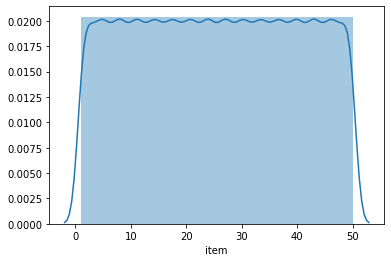

In [24]:
sns.distplot(mm['item'])

In [122]:
# plt.plot(mm.index, )
temp = mm[(mm['month']==7)&(mm['year']==2014)]['sales']
plt.plot(temp.index,temp.values)
print(temp.shape)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().